In [3]:
import sys
#!{sys.executable} -m pip install pandas-profiling
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Overview
Отримані з експериментів дані необхідно класифікувати та перевірити на відповідність подій розпадам бозонів Хіггса. Для ідентифікації сигналу (каналу, або події), що відповідає розпаду бозону використовуються спеціальні алгоритми, побудовані дослідниками на базі фізичних знань. Але все більшої уваги привертають підходи до класифікації, побудовані за допомогою методів машинного навчання. Вони є досить перспективними у напрямку покращення існуючих підходів та алгоритмів. З цією метою організація надала дані для можливості створення нових моделей іншими науковцями та фахівцями з data science. 

## Getting data
The data were downloaded from http://opendata.cern.ch/record/328

ATLAS collaboration (2014). Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014. CERN Open Data Portal. DOI:10.7483/OPENDATA.ATLAS.ZBP2.M5T8

In [4]:
all_data = pd.read_csv('./input/general/atlas-higgs-challenge-2014-v2.csv')
print('Number of rows: %d, number of columns: %d' % all_data.shape)
all_data.head()

Number of rows: 818238, number of columns: 35


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


## Overview of the data

In [5]:
pp.ProfileReport(all_data)

Number of variables,35
Number of observations,818238
Total Missing (%),0.0%
Total size in memory,218.5 MiB
Average record size in memory,280.0 B
Numeric,23
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,10


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
EventId                        818238 non-null int64
DER_mass_MMC                   818238 non-null float64
DER_mass_transverse_met_lep    818238 non-null float64
DER_mass_vis                   818238 non-null float64
DER_pt_h                       818238 non-null float64
DER_deltaeta_jet_jet           818238 non-null float64
DER_mass_jet_jet               818238 non-null float64
DER_prodeta_jet_jet            818238 non-null float64
DER_deltar_tau_lep             818238 non-null float64
DER_pt_tot                     818238 non-null float64
DER_sum_pt                     818238 non-null float64
DER_pt_ratio_lep_tau           818238 non-null float64
DER_met_phi_centrality         818238 non-null float64
DER_lep_eta_centrality         818238 non-null float64
PRI_tau_pt                     818238 non-null float64
PRI_tau_eta                    818238 non-null float64
PRI_tau_phi

In [7]:
all_data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,KaggleWeight
count,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,...,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000
mean,509118.500000,-48.819019,49.252714,81.140561,57.849524,-707.740880,-600.191191,-708.681306,2.373871,18.969617,...,0.979923,-348.757840,-399.693294,-399.703858,-691.626111,-708.442206,-708.443312,73.205594,0.503144,2.012577
std,236205.109119,406.118397,35.378609,40.582708,63.411938,454.793899,658.724040,453.328599,0.780875,21.918491,...,0.978793,533.097006,489.428560,489.420013,480.274744,453.699150,453.697158,98.331754,0.572200,5.439641
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000461,0.000839
25%,304559.250000,78.166000,19.304000,59.414000,14.164250,-999.000000,-999.000000,-999.000000,1.814000,2.839000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.005721,0.010415
50%,509118.500000,105.061000,46.484000,73.744000,38.470000,-999.000000,-999.000000,-999.000000,2.492000,12.383000,...,1.000000,38.965000,-1.865000,-2.105000,-999.000000,-999.000000,-999.000000,40.506000,0.357223,0.806562
75%,713677.750000,130.730000,73.620000,92.188000,79.226750,0.499000,84.031750,-4.548000,2.962000,27.634000,...,2.000000,75.470750,0.432000,0.489000,33.800000,-2.436000,-2.265000,110.387000,0.733462,2.360271
max,918237.000000,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,...,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000,2.386316,106.908407


In [8]:
#Different datasets labels:
all_data['KaggleSet'].unique()

array(['t', 'b', 'v', 'u'], dtype=object)

_We will use the test dataset labeled as 't'_

In [9]:
test_data = all_data[all_data['KaggleSet'] == 't']
print('Number of rows: %d, number of columns: %d' % test_data.shape)

Number of rows: 250000, number of columns: 35


## Data PreProcessing
Before analysis start, we should perform cleaning and transforming of the dataset in order to make it convenient for using in the next steps.

In [10]:
print('Dataset before:')
test_data.head()

Dataset before:


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


#### Transforming
Firstly, let's transform nominal variable (Label) into numerical (Label_N).

In [11]:
def label_transform (row) :
    if row['Label'] == 's' : 
        return 1
    return 0

td_1 = test_data.assign(Label_N = test_data.apply(lambda row : label_transform(row), axis = 1))
td_1 = td_1.loc[:, td_1.columns != 'Label']
td_1.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,KaggleSet,KaggleWeight,Label_N
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,t,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,t,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,t,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,t,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,t,6.245333,0


#### Cleaning
Secondly, we should clean some columns that serves as meta/technical info.

In [12]:
td_2 = td_1.loc[:, td_1.columns != 'Weight']
td_2 = td_2.loc[:, td_2.columns != 'KaggleWeight']
td_2 = td_2.loc[:, td_2.columns != 'KaggleSet']
td_2 = td_2.loc[:, td_2.columns != 'EventId']
td_transf = td_2
td_transf.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label_N
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


## Exploratory Data Analysis

#### Missingness

By default, missing or meaningless values are encoded as -999.0.

In [13]:
td_miss = td_transf[td_transf[td_transf.columns].eq(-999.0).any(axis=1)]
print('Number of all records in test dataset: %d' % td_transf.shape[0])
print('Number of missing records (that have at list one missing value) in test dataset: %d' % td_miss.shape[0])
print('Number of SIGNAL records (original Label = \'s\' or current Label_N = 1) in the whole test dataset: %d' % td_transf[td_transf['Label_N'] == 1].shape[0])
print('Number of SIGNAL records that have at list one missing value (Label_N = 1) in test dataset: %d' % td_miss[td_miss['Label_N'] == 1].shape[0])

Number of all records in test dataset: 250000
Number of missing records (that have at list one missing value) in test dataset: 181886
Number of SIGNAL records (original Label = 's' or current Label_N = 1) in the whole test dataset: 85667
Number of SIGNAL records that have at list one missing value (Label_N = 1) in test dataset: 53773


In accordance to obtained results, dataset contains a lot of records that have at least one missing value (181886 out of 250000). This prevent us from even thinking about simple deletion of such records:) 
The other way to solve this problem could be found in using imputation. Unfortuately, following tha meaning of the missingness in the data source, we cannot use computation here, as most values that are missing cannot be computed for features due to the nature of the observed event underneath. It was found that most missings depend on ```PRI_jet_num```. In case of ```PRI_jet_num < 1``` - some of the features are meaningless.
Here is two way out from such situation that we could look at: 
- use algorythms that are robust to the missing values
- split dataset into two parts and build separate solutions

#### Correlation matrix

In [14]:
corr_data = td_transf.corr()

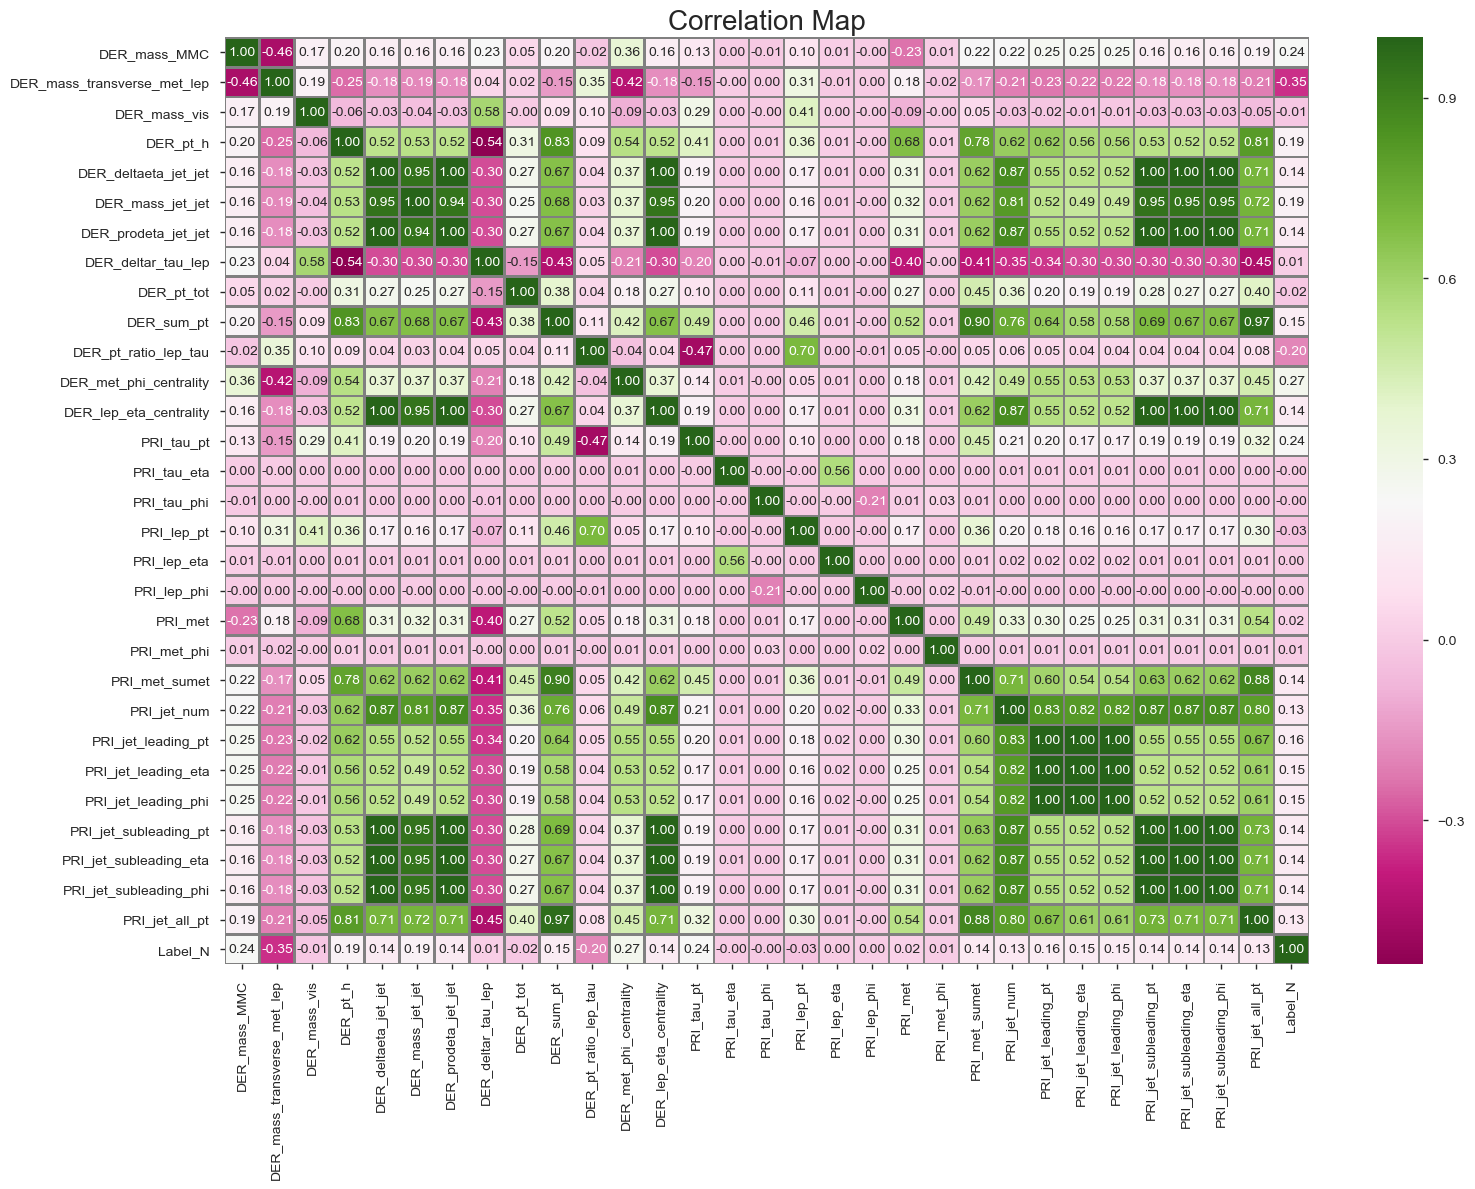

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_data,annot=True,cmap="PiYG",linewidths=1,fmt=".2f",linecolor="grey")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

#### Dummifying categorical data

In addition, we should treat ```PRI_jet_num``` as a factor. Therefore, to easily modify dataset the dummies library could be used.

In [16]:
dummy = pd.get_dummies(td_transf['PRI_jet_num'].astype('category'))
columns = dummy.columns.astype(str).tolist()
columns = ['PRI_jet_num_' + w for w in columns]
dummy.columns = columns
td_dummy = pd.concat((td_transf, dummy), axis=1)
td_dummy.drop('PRI_jet_num', axis=1, inplace=True)
td_dummy.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label_N,PRI_jet_num_0,PRI_jet_num_1,PRI_jet_num_2,PRI_jet_num_3
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,0.444,46.062,1.24,-2.475,113.497,1,0,0,1,0
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1.158,-999.000,-999.00,-999.000,46.226,0,0,1,0,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.028,-999.000,-999.00,-999.000,44.251,0,0,1,0,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,-999.000,-999.000,-999.00,-999.000,-0.000,0,1,0,0,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-999.000,-999.000,-999.00,-999.000,0.000,0,1,0,0,0


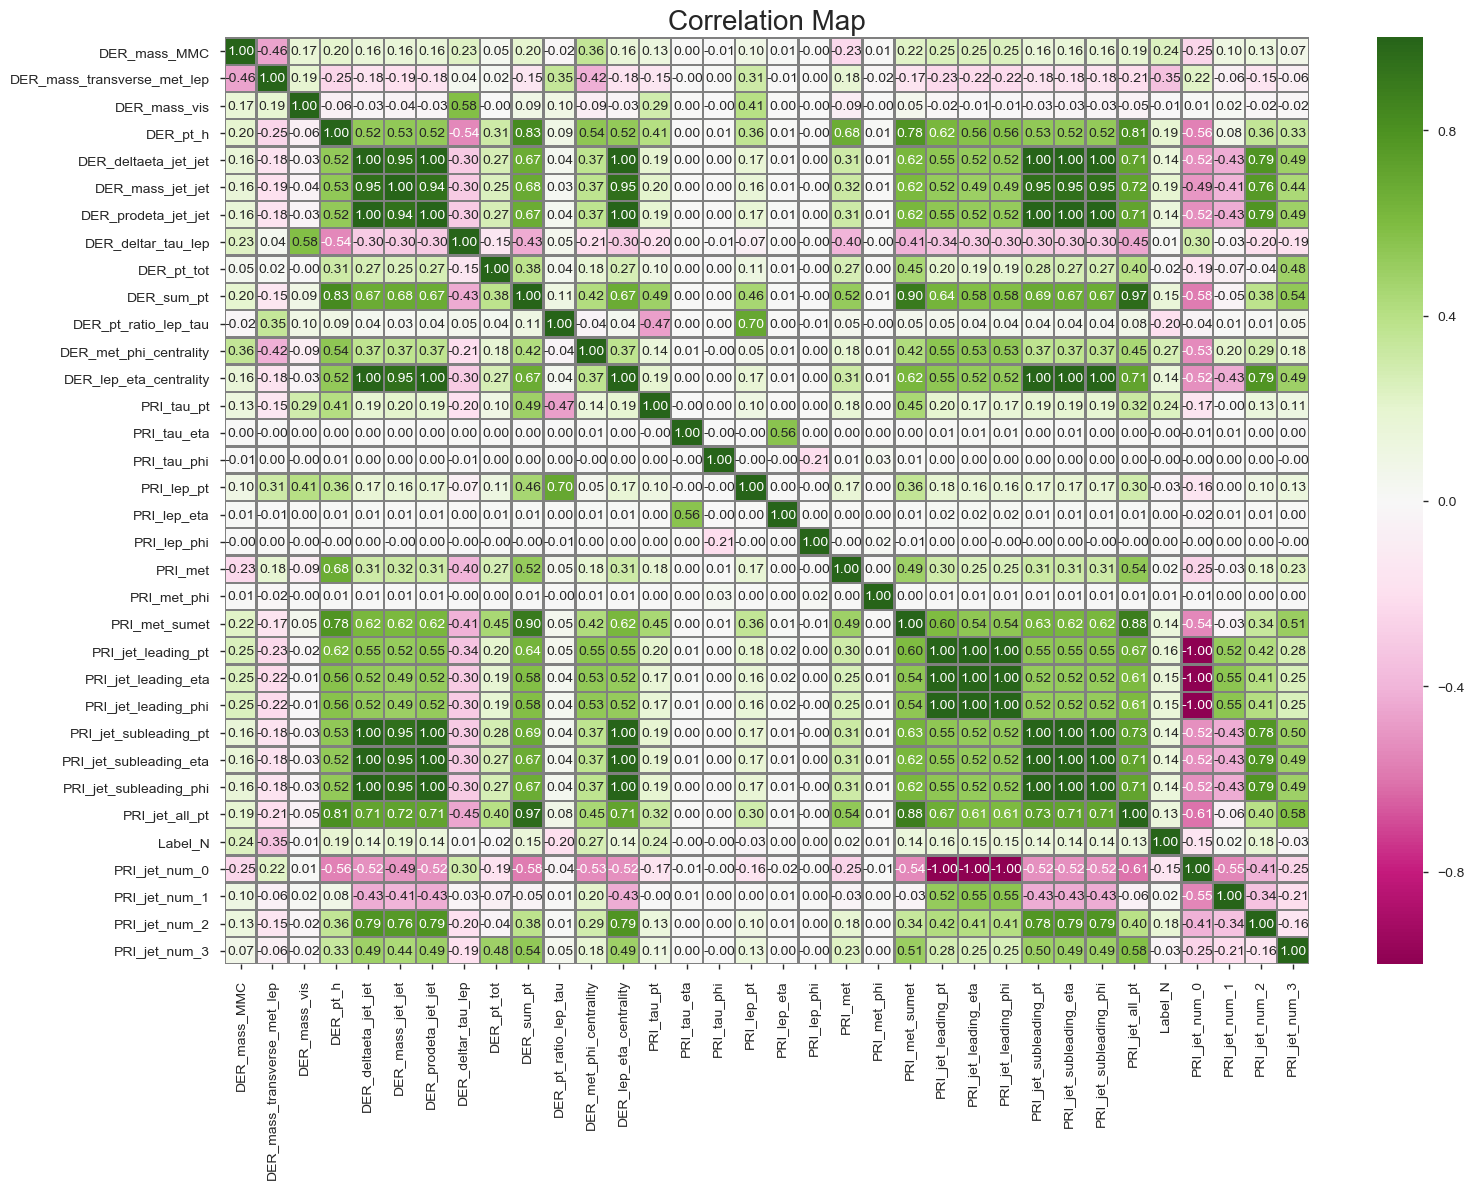

In [18]:
corr_data_2 = td_dummy.corr()
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_data_2,annot=True,cmap="PiYG",linewidths=1,fmt=".2f",linecolor="grey")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()